# برازش

In [1]:
import numpy as np
def breit_wigner( E , f_r , e_r , gamma , error ):
    ret = f_r / ( ( E - e_r )**2 + gamma*gamma/4 )
    errors = np.random.normal( 0 , error , E.shape )

    ret += ret*errors

    return ret

def gaussian( E , mean , sigma , error ):
    ret = np.exp( -(E-mean)**2 / (2*sigma*sigma ) )
    errors = np.random.normal( 0 , error , E.shape )

    ret += ret*errors

    return ret
    

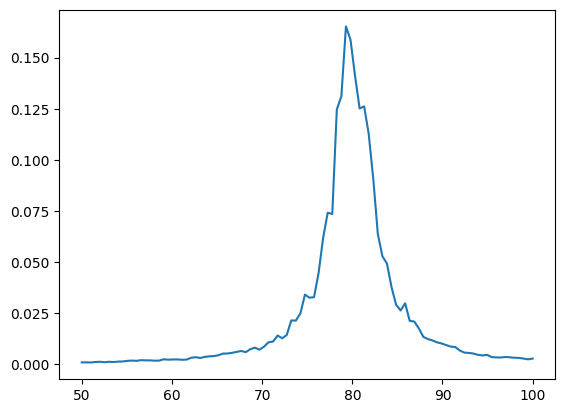

In [2]:
import matplotlib.pyplot as plt
E = np.linspace( 50 , 100 , 100 )
experiment_bw = breit_wigner( E , 1 , 80 , 5 , 0.1 )
#experiment_g = gaussian( E , 70 , 1 , 0.01 )
experiment = experiment_bw
plt.plot( E , experiment)

In [3]:
#range of params for search
fr_ = 1 #np.linspace( 0.8 , 1.1 , 100 )
p1_vals = np.linspace( 70 , 90 , 500 )
p2_vals = np.linspace( 0 , 10 , 100)

p1_name = 'e_r'
p2_name = 'gamma'

E_grid, e_r_grid, gamma_grid = np.meshgrid(E, p1_vals, p2_vals, indexing='ij')

theory = breit_wigner(E_grid, fr_ , e_r_grid, gamma_grid, 0)
print( theory.shape )

(100, 500, 100)


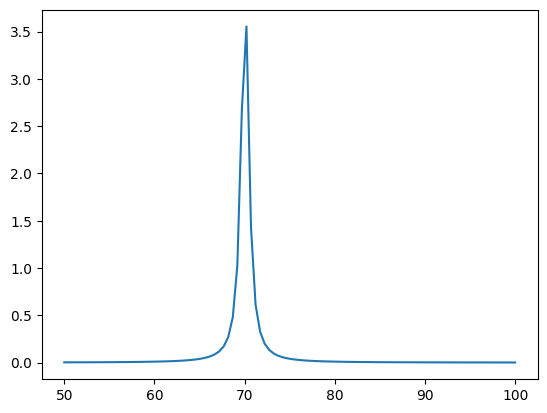

In [4]:
plt.plot( E , theory[:,1,10] )

In [129]:
#for gaussian
p1_vals = np.linspace( 65 , 75 , 500 )
p2_vals = np.linspace( 0.5 , 5 , 9)


p1_name = 'mean'
p2_name = 'sigma'

E_grid, mean_grid, sigma_grid = np.meshgrid(E, p1_vals, p2_vals, indexing='ij')

theory = gaussian(E_grid, mean_grid, sigma_grid, 0)
print( gaussian_values.shape )

(100, 500, 9)


In [5]:
experiment_new = np.repeat(experiment[:, np.newaxis, np.newaxis], p1_vals.size, axis=1)
experiment_new = np.repeat(experiment_new, p2_vals.size, axis=2)

rss_values = np.sum( ( (theory - experiment_new) ** 2 ), axis=0)
#rss_values = np.sum( ( (theory - experiment_new) ** 2 ) / experiment_new, axis=0)


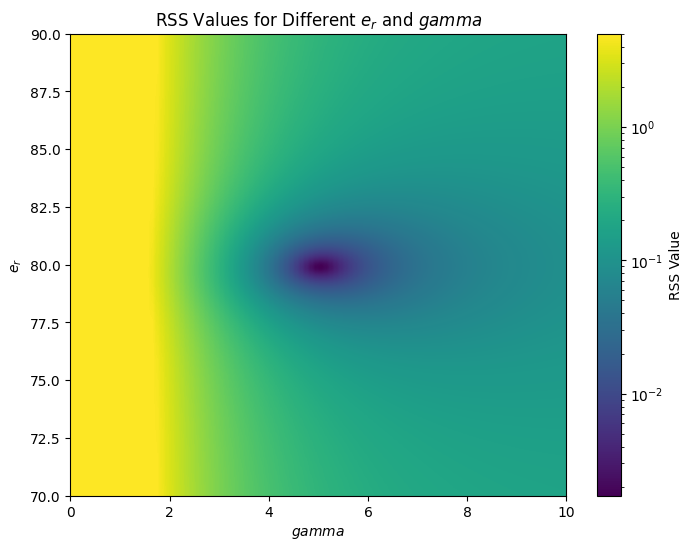

In [7]:
# Plot RSS values as a heatmap
from matplotlib.colors import LogNorm

rss_values[ rss_values>5 ] = 5
plt.figure(figsize=(8, 6))
plt.imshow(rss_values, aspect='auto', origin='lower', 
           extent=[p2_vals[0], p2_vals[-1], p1_vals[0], p1_vals[-1]], 
           cmap='viridis' , norm=LogNorm())
plt.colorbar(label='RSS Value')
plt.xlabel(f'${p2_name}$')
plt.ylabel(f'${p1_name}$')
plt.title(f'RSS Values for Different ${p1_name}$ and ${p2_name}$')
plt.show()


In [8]:
min_idx = np.unravel_index(rss_values.argmin(), rss_values.shape)
p1_opt = p1_vals[min_idx[0]]
p2_opt = p2_vals[min_idx[1]]

print(f"Optimal {p1_name}: {p1_opt}")
print(f"Optimal {p2_name}: {p2_opt}")

Optimal e_r: 79.93987975951904
Optimal gamma: 5.05050505050505


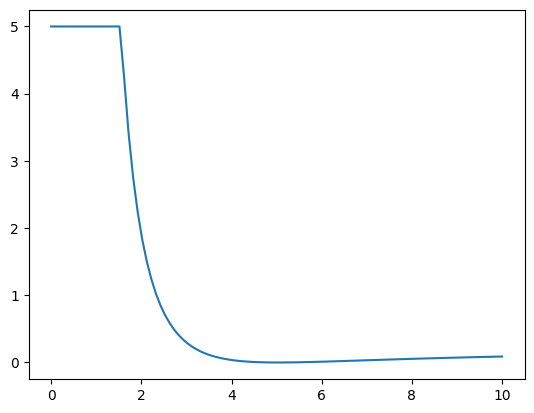

In [9]:
plt.plot( p2_vals ,  rss_values[ min_idx[0] , :] - rss_values[ min_idx[0] , min_idx[1] ])

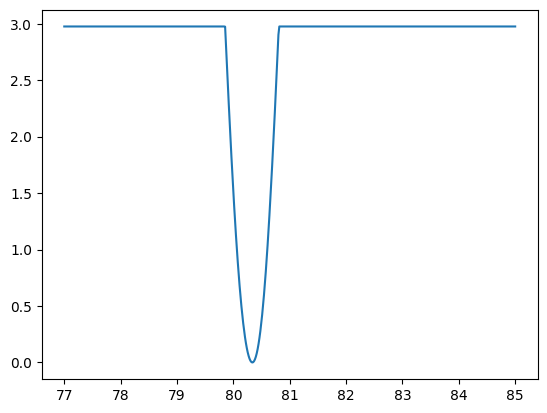

In [127]:
plt.plot( p1_vals ,  rss_values[ : , min_idx[1] ] - rss_values[ min_idx[0] , min_idx[1] ] )